In [ ]:
import os
print(os.listdir('/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data'))

['Sunflower', 'lilly_of_the_valley', 'scilia', 'orris_root', 'toad_lilly', 'flowering_dogwood']


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#model selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD
from keras.utils.np_utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn
import cv2                  
import numpy as np  
from tqdm import tqdm


In [ ]:
X=[]
Z=[]
IMG_SIZE=150


In [ ]:
sunflower = "/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data/Sunflower"
lilly = '/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data/lilly_of_the_valley'
dogwood = '/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data/flowering_dogwood'
orris = '/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data/orris_root'
scilia = '/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data/scilia'
toad = '/content/drive/MyDrive/Colab Notebooks/my_projects/flower_recog/data/toad_lilly'

In [ ]:
def assign_label(img,flower_type):
    return flower_type

In [ ]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))
        
        

In [ ]:
make_train_data('sunflower',sunflower)
print(len(X))

100%|██████████| 80/80 [00:18<00:00,  4.37it/s]

80


In [ ]:
make_train_data('dogwood',dogwood)
print(len(X))


100%|██████████| 80/80 [00:17<00:00,  4.49it/s]

160


In [ ]:
make_train_data('lilly',lilly)
print(len(X))

100%|██████████| 80/80 [00:18<00:00,  4.33it/s]

240


In [ ]:
make_train_data('orris',orris)
print(len(X))

100%|██████████| 80/80 [00:19<00:00,  4.16it/s]

320


In [ ]:
make_train_data('scilia',scilia)
print(len(X))

100%|██████████| 80/80 [00:18<00:00,  4.22it/s]

400


In [ ]:
make_train_data('toad',toad)
print(len(X))

100%|██████████| 80/80 [00:18<00:00,  4.37it/s]

480


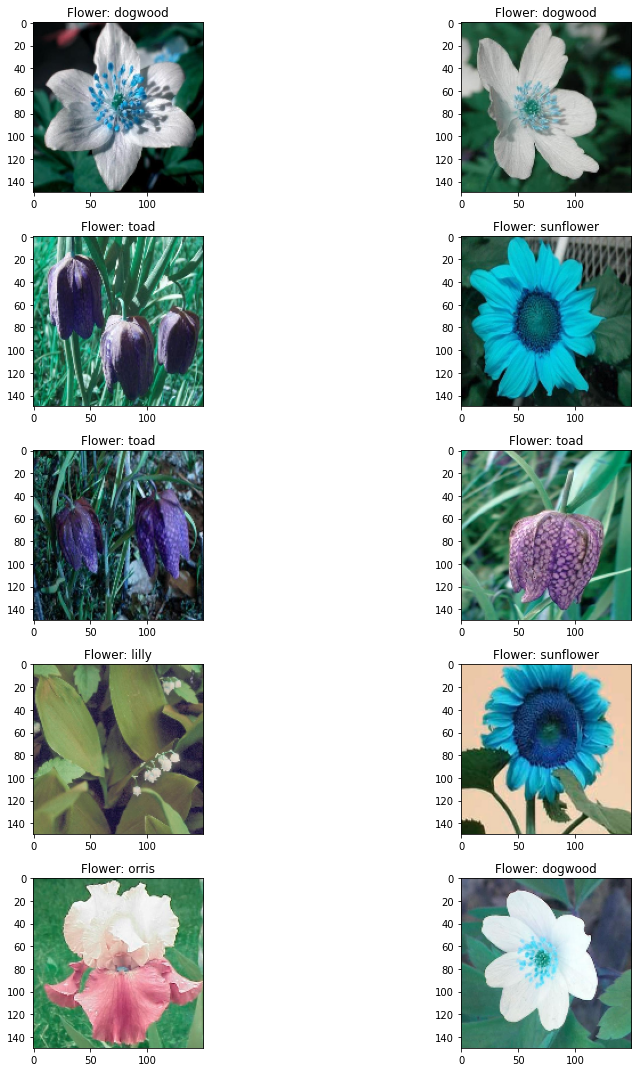

In [ ]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [ ]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,6)
X=np.array(X)
X=X/255

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [ ]:
np.random.seed(42)
rn.seed(42)


In [ ]:
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor

from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model

from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy

In [ ]:
base_model = InceptionV3(weights = 'imagenet', include_top = False, input_shape=(299, 299, 3))

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

In [ ]:
# Add a fully-connected layer and a logistic layer with 20 classes 
#(there will be 120 classes for the final submission)
x = Dense(256, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)

In [ ]:
model = Model(inputs = base_model.input, outputs = predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(Adam(lr=.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255, 
                                   rotation_range=30, 
                                   # zoom_range = 0.3, 
                                   width_shift_range=0.2,
                                   height_shift_range=0.2, 
                                   horizontal_flip = 'true')
train_generator = train_datagen.flow(x_train, y_train, shuffle=False, batch_size=10, seed=10)

In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_generator = train_datagen.flow(x_test, y_test, shuffle=False, batch_size=10, seed=10)

In [ ]:
model.fit_generator(train_generator,
                      steps_per_epoch = 25,
                      validation_data = val_generator,
                      validation_steps = 25,
                      epochs = 50,
                      verbose = 2)

Epoch 1/50
25/25 - 22s - loss: 1.6376 - accuracy: 0.3640 - val_loss: 1.6536 - val_accuracy: 0.3417
Epoch 2/50
25/25 - 11s - loss: 1.5910 - accuracy: 0.3960
Epoch 3/50
25/25 - 11s - loss: 1.5701 - accuracy: 0.3680
Epoch 4/50
25/25 - 11s - loss: 1.5601 - accuracy: 0.4200
Epoch 5/50
25/25 - 11s - loss: 1.5098 - accuracy: 0.4040
Epoch 6/50
25/25 - 11s - loss: 1.5067 - accuracy: 0.4120
Epoch 7/50
25/25 - 11s - loss: 1.5125 - accuracy: 0.4200
Epoch 8/50
25/25 - 11s - loss: 1.4441 - accuracy: 0.4480
Epoch 9/50
25/25 - 11s - loss: 1.4416 - accuracy: 0.4520
Epoch 10/50
25/25 - 11s - loss: 1.4466 - accuracy: 0.4320
Epoch 11/50
25/25 - 11s - loss: 1.4187 - accuracy: 0.4600
Epoch 12/50
25/25 - 11s - loss: 1.3597 - accuracy: 0.4720
Epoch 13/50
25/25 - 11s - loss: 1.3416 - accuracy: 0.5080
Epoch 14/50
25/25 - 11s - loss: 1.3695 - accuracy: 0.4720
Epoch 15/50
25/25 - 11s - loss: 1.2773 - accuracy: 0.5240
Epoch 16/50
25/25 - 11s - loss: 1.3219 - accuracy: 0.4600
Epoch 17/50
25/25 - 11s - loss: 1.3646 